## Initial Background and Plan

#### The goal of this data science project is to create a model to forecast NBA player statistics. Using game-logs dating back to 2016 (can go even further but will try from 2016 to start), I will try to predict the statistics of each player for an upcoming game and use the predictions to create an optimal lineup to be played in daily fantasy.

#### DraftKings/FanDuel daily fantasy games are contests that have the user choose 5 players that they think will have the most fantasy points on any given night. If your team scores the most fantasy points, you win cash prizes. The catch is that there is a salary cap when choosing the players (so you cannot simply choose the best players every night). My model will try to find the undervalued players (based on their draftkings salary).

#### My data was collected from stats.nba.com. I webscraped the game logs dating back to 2016 with a function and was able to collect over 100,000 game logs total (will test and see if I need more). These game logs will be my initial inputs into the model to predict the player's next game statistics. I also created a function that scrapes the advanced stats of the opposing team's defense (if a player is playing against a better defense, maybe they won't score as well). My goal is to continue to incorporate other variables that could play a factor in the model. Further, I need to find the draftkings/fanduel salaries numbers. 

In [4]:
import pandas as pd 
from selenium import webdriver
import time

ModuleNotFoundError: No module named 'selenium'

In [2]:
# Function to return game logs from season and amount of pages wanted (2019-20 and 50 pages, for example)

def nba_game_logs1(num_clicks):
    
    # Path to Driver 
    path = '/Users/willhanley/Desktop/chromedriver 3'
    driver = webdriver.Chrome(executable_path=path)
    
    # URL
    url = 'https://www.nba.com/stats/players/boxscores/?Season=2016-17&SeasonType=Regular%20Season'
    driver.get(url)
    
    # location of table, button to click to next page 
    table = driver.find_element_by_class_name('nba-stat-table__overflow').text.split('\n')
    next_page = driver.find_elements_by_xpath('/html/body/main/div/div/div[2]/div/div/nba-stat-table/div[3]/div/div/a[2]')

    # empty lists to be appended to 
    player_names = []
    player_stats = []
    
    # Loop through num_clicks times
    for _ in range(num_clicks):
        
        # Define the table we are scraping from 
        table = driver.find_element_by_class_name('nba-stat-table__overflow').text.split('\n')
        
        # append to player_names and player_stats lists
        for num, info in enumerate(table):
            if num == 0:
                continue
            else:
                if num % 2 == 1:
                    player_names.append(info)
                if num % 2 == 0:
                    player_stats.append([i for i in info.split(' ')])
                
        # Click to next page            
        driver.execute_script("arguments[0].click();", next_page[0])
        
        # Pause 5 seconds 
        time.sleep(4)
 
    # Return dataframe made from player_names and player_stats
    return pd.DataFrame({'Player': player_names,
                  'Team': [i[0] for i in player_stats],
                  'Match-up': [i[2]+i[3] for i in player_stats],
                  'Date': [i[4] for i in player_stats],
                  'W/L': [i[5] for i in player_stats],
                  'Min': [i[6] for i in player_stats],
                  'Pts': [i[7] for i in player_stats],
                  'FGM': [i[8] for i in player_stats],
                  'FGA': [i[9] for i in player_stats],
                  'FG%': [i[10] for i in player_stats],
                  '3PM': [i[11] for i in player_stats],
                  '3PA': [i[12] for i in player_stats],
                  '3P%': [i[13] for i in player_stats],
                  'FTM': [i[14] for i in player_stats],
                  'FTA': [i[15] for i in player_stats],
                  'FT%': [i[16] for i in player_stats],
                  'OREB': [i[17] for i in player_stats],
                  'DREB': [i[18] for i in player_stats],
                  'REB': [i[19] for i in player_stats],
                  'AST': [i[20] for i in player_stats],
                  'STL': [i[21] for i in player_stats],
                  'BLK': [i[22] for i in player_stats],
                  'TOV': [i[23] for i in player_stats],
                  'PF': [i[24] for i in player_stats],
                  '+/-': [i[25] for i in player_stats]})

In [3]:
# Function to return team defense statistics from season input (2019-20, for example)

def nba_defense(season):
    
    # Path to Driver 
    path = '/Users/willhanley/Desktop/chromedriver 3'
    driver = webdriver.Chrome(executable_path=path)
    
    # URL
    url = f'https://www.nba.com/stats/teams/defense/?sort=W&dir=-1&Season={season}&SeasonType=Regular%20Season'
    driver.get(url)
    
    # location of table, button to click to next page 
    table = driver.find_element_by_class_name('nba-stat-table__overflow').text.split('\n')
    
    # empty lists to append to 
    teams = []
    team_stats = []
    
    # find locations of team names and team stats 
    for num, info in enumerate(table):
        if num > 8:
            if num % 3 == 0:
                teams.append(info)
            if (num -1) % 3 == 0:
                team_stats.append([i for i in info.split(' ')])

    # return dataframe 
    return pd.DataFrame({
        'Team': teams,
        'GP': [i[0] for i in team_stats],
        'W': [i[1] for i in team_stats],
        'L': [i[2] for i in team_stats],
        'MIN': [i[3] for i in team_stats],
        'DEF_RTG': [i[4] for i in team_stats],
        'DREB': [i[5] for i in team_stats],
        'DREB%': [i[6] for i in team_stats],
        'STL': [i[7] for i in team_stats],
        'BLK': [i[8] for i in team_stats],
        'OPP_PTS_off_TOV': [i[9] for i in team_stats],
        'OPP_PTS_2nd_CHANCE': [i[10] for i in team_stats],
        'OPP_PTS_FB': [i[11] for i in team_stats],
        'OPP_PTS_PAINT': [i[12] for i in team_stats]})


In [ ]:
# Ran function and collected over 100,000 game logs from 2016-2020

# df0 = nba_game_logs(400)
# df = nba_game_logs1(522)
# df1 = nba_game_logs1(522)
# df2 = nba_game_logs1(522)

# df1.to_csv('2017-2018stats.csv', index=False)
# df.to_csv('2018-2019stats.csv', index=False)
# df2.to_csv('2016=2017stats.csv', index=False)

In [ ]:
# df0['Date'] = pd.to_datetime(df0['Date'])
# df['Date'] = pd.to_datetime(df['Date'])
# df1['Date'] = pd.to_datetime(df1['Date'])
# df2['Date'] = pd.to_datetime(df2['Date'])

# df0.set_index('Date', inplace=True)
# df.set_index('Date', inplace=True)
# df1.set_index('Date', inplace=True)
# df2.set_index('Date', inplace=True)

# frames = [df0,df,df1,df2]

# df_16_20 = pd.concat(frames)

# df_16_20.sort_index(inplace=True)

# df_16_20.to_csv('merged16-20.csv', index=False)

In [5]:
hoops = pd.read_csv('final_data.csv')

In [6]:
hoops.head()

,Player,Team,Match-up,Date,W/L,Min,Pts,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,Mike Miller,DEN,@OKC,04/12/2017,W,28,0,0,3,0.0,...,-,1,7,8,4,0,0,1,0,-4
1,Victor Oladipo,OKC,vs.DEN,04/12/2017,L,25,10,4,9,44.4,...,50.0,0,3,3,3,1,1,3,0,-1
2,Taj Gibson,OKC,vs.DEN,04/12/2017,L,22,13,4,11,36.4,...,83.3,3,4,7,0,0,2,1,2,-12
3,Mason Plumlee,DEN,@OKC,04/12/2017,W,33,16,6,10,60.0,...,66.7,1,4,5,0,0,1,3,5,8
4,Josh Huestis,OKC,vs.DEN,04/12/2017,L,24,7,3,7,42.9,...,0.0,2,3,5,2,0,3,0,0,5


In [7]:
hoops.shape

(100693, 25)

In [8]:
# Drop columns with percentages

hoops.drop(columns=['FT%', '3P%', 'FG%'], inplace=True)

# Save numerical columns as ints

hoops[['Min', 'Pts', 'FGM','FGA','3PM', '3PA', 'FTM', 'FTA', 'OREB',
       'DREB','REB','AST','STL','BLK','TOV','PF', '+/-']] = hoops[['Min', 'Pts', 'FGM','FGA','3PM', '3PA', 'FTM', 'FTA', 'OREB',
       'DREB','REB','AST','STL','BLK','TOV','PF', '+/-']].astype(str).astype(int)

In [9]:
# Function if player has a double double 
def double_double(row):
    val = 0
    if (row['Pts'] >= 10) & (row['AST'] >= 10) | \
    (row['Pts'] >=10) & (row['REB'] >= 10) | (row['AST'] >=10) & (row['REB'] >= 10):
        val += 1
    return val

# Function if player has a triple double 
def triple_double(row):
    val = 0
    if (row['Pts'] >= 10) & (row['AST'] >= 10) & (row['REB'] >=10) | \
    (row['Pts'] >=10) & (row['AST'] >= 10) & (row['STL'] >= 10) | \
    (row['Pts'] >=10) & (row['REB'] >= 10) & (row['BLK'] >= 10) | \
    (row['Pts'] >=10) & (row['AST'] >= 10) & (row['BLK'] >= 10):
        val += 1
    return val

In [10]:
# Create Double double column
hoops['dubdub'] = hoops.apply(double_double, axis=1)

# Create Triple double column
hoops['tripdub'] = hoops.apply(triple_double, axis=1)

# Create Draft kings score column (based on draftkings formula)
hoops['DraftKings'] = hoops['Pts'] + .5*hoops['3PM'] + 1.25*hoops['REB'] + 1.5*hoops['AST'] \
+ 2*hoops['STL'] + 2*hoops['BLK'] -.5*hoops['TOV'] + 1.5*hoops['dubdub'] + 3*hoops['tripdub']


In [11]:
hoops.head()

,Player,Team,Match-up,Date,W/L,Min,Pts,FGM,FGA,3PM,...,REB,AST,STL,BLK,TOV,PF,+/-,dubdub,tripdub,DraftKings
0,Mike Miller,DEN,@OKC,04/12/2017,W,28,0,0,3,0,...,8,4,0,0,1,0,-4,0,0,15.50
1,Victor Oladipo,OKC,vs.DEN,04/12/2017,L,25,10,4,9,1,...,3,3,1,1,3,0,-1,0,0,21.25
2,Taj Gibson,OKC,vs.DEN,04/12/2017,L,22,13,4,11,0,...,7,0,0,2,1,2,-12,0,0,25.25
3,Mason Plumlee,DEN,@OKC,04/12/2017,W,33,16,6,10,0,...,5,0,0,1,3,5,8,0,0,22.75
4,Josh Huestis,OKC,vs.DEN,04/12/2017,L,24,7,3,7,1,...,5,2,0,3,0,0,5,0,0,22.75


In [12]:
# Individual players data (Lebron James)
lebron = hoops[hoops['Player'] == 'LeBron James']
lebron.set_index('Date', inplace=True)

##### Basic Model 

<AxesSubplot:xlabel='Date'>

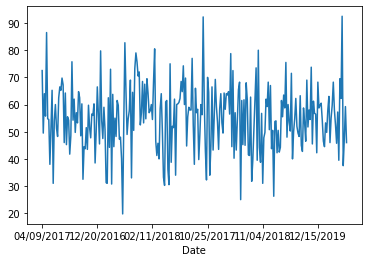

In [13]:
lebron['DraftKings'].plot()